In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random

In [4]:
csv_path = '/content/drive/MyDrive/MESTRADO/Brain Tumor.csv'   # caminho para o CSV
img_dir  = '/content/drive/MyDrive/MESTRADO/Brain Tumor/Brain Tumor'

In [5]:
# exibe distribuição de classes
df = pd.read_csv(csv_path)
print("Distribuição de classes (0 = sem tumor, 1 = com tumor):")
print(df['Class'].value_counts(), end='\n\n')

Distribuição de classes (0 = sem tumor, 1 = com tumor):
Class
0    2079
1    1683
Name: count, dtype: int64



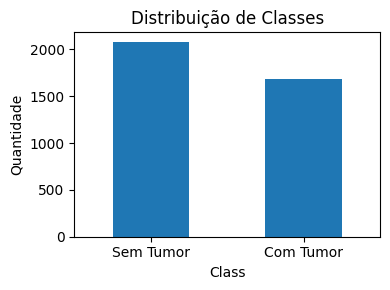

In [6]:
plt.figure(figsize=(4,3))
df['Class'].value_counts().sort_index().plot(kind='bar')
plt.xticks([0,1], ['Sem Tumor','Com Tumor'], rotation=0)
plt.ylabel("Quantidade")
plt.title("Distribuição de Classes")
plt.tight_layout()
plt.show()

In [7]:
def get_image_size(path):
    with Image.open(path) as img:
        return img.size  # (width, height)

In [8]:
sizes = []
for img_name in df['Image']:
    # Tente jpg e png, adapte se necessário:
    for ext in ['.jpg', '.png']:
        p = os.path.join(img_dir, img_name + ext)
        if os.path.exists(p):
            sizes.append(get_image_size(p))
            break
    else:
        # se não encontrou a imagem
        sizes.append((np.nan, np.nan))

In [9]:
sizes = np.array(sizes)
df['width']  = sizes[:,0]
df['height'] = sizes[:,1]

print("Estatísticas de tamanho das imagens:")
print(df[['width','height']].describe(), end='\n\n')

Estatísticas de tamanho das imagens:
        width  height
count  3762.0  3762.0
mean    240.0   240.0
std       0.0     0.0
min     240.0   240.0
25%     240.0   240.0
50%     240.0   240.0
75%     240.0   240.0
max     240.0   240.0



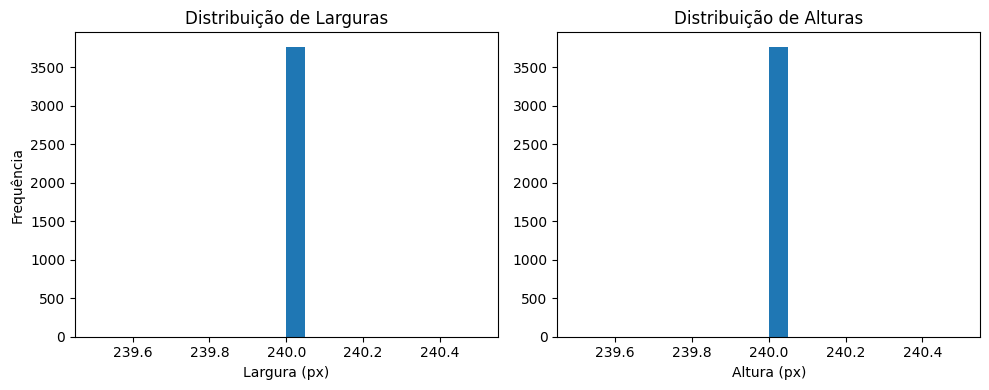

In [11]:
# Histograma de larguras e alturas
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(df['width'].dropna(), bins=20)
plt.xlabel("Largura (px)")
plt.ylabel("Frequência")
plt.title("Distribuição de Larguras")

plt.subplot(1,2,2)
plt.hist(df['height'].dropna(), bins=20)
plt.xlabel("Altura (px)")
plt.title("Distribuição de Alturas")

plt.tight_layout()
plt.show()

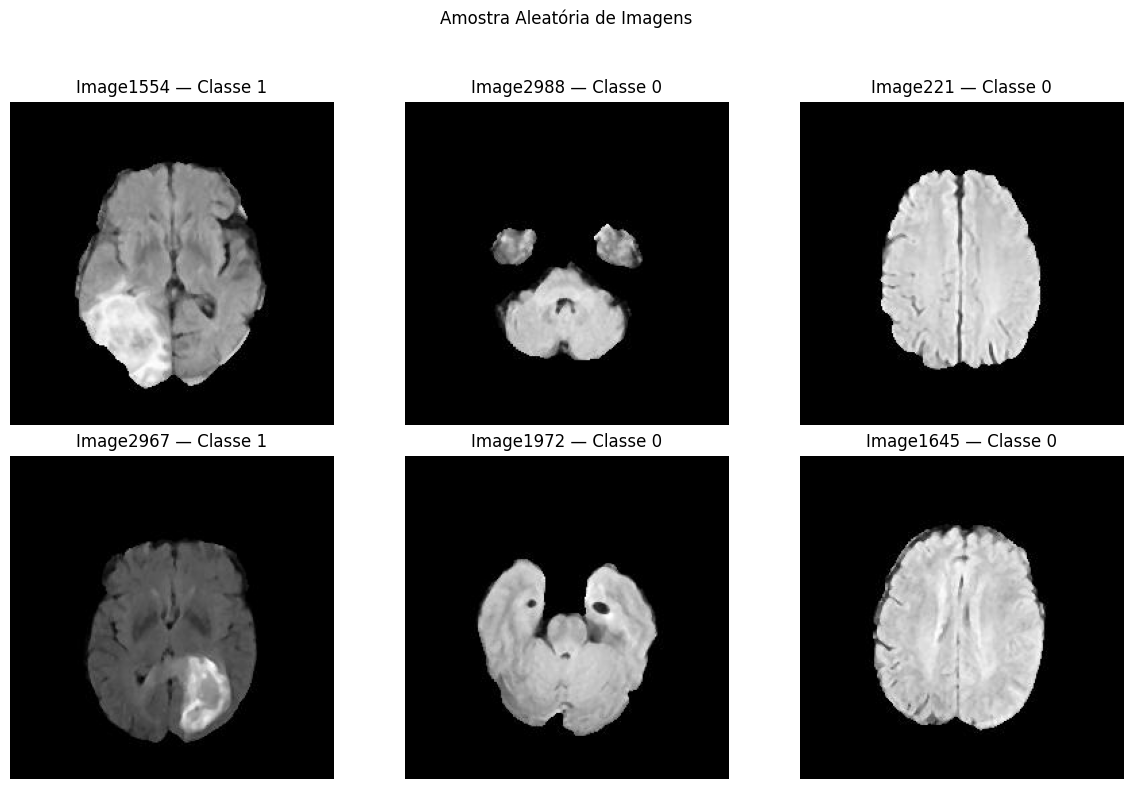

In [12]:
# Visualizar algumas imagens amostradas
n = 6  # quantas imagens mostrar
sample = df.dropna(subset=['width','height']).sample(n, random_state=42)

plt.figure(figsize=(12, 8))
for i, (_, row) in enumerate(sample.iterrows()):
    # Carrega imagem
    img_path = None
    for ext in ['.jpg', '.png']:
        p = os.path.join(img_dir, row['Image'] + ext)
        if os.path.exists(p):
            img_path = p
            break
    img = Image.open(img_path) if img_path else Image.new('RGB',(row['width'],row['height']),color='black')

    plt.subplot(2, 3, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"{row['Image']} — Classe {row['Class']}")
    plt.axis('off')

plt.suptitle("Amostra Aleatória de Imagens")
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()